# Analysis of stock prices in different time periods


**NOTE:** `base date point` means that base value will be set to the first date in dataset.

Example: if we want to get daily prices within a week then `base date point` means that the base value will be set **only** for data point with first date

In [1]:
import sys

sys.path.append('..')

from analysis_base_first_date import Column

from loguru import logger
import numpy as np
import pandas as pd
from seaborn import lineplot, barplot, scatterplot, boxplot
from matplotlib import pyplot

pd.options.mode.chained_assignment = None

START_DATE = "2011-01-01"
END_DATE = "2021-01-01"
FILENAME = "sp500.csv"
LIMIT = None
PLOT_CI = 95

logger.remove()
logger.add(sys.stdout, level="INFO")


def plot(**kwargs):
    funcs = [boxplot, barplot, scatterplot, lineplot]
    # NOTE: after lineplot X will be float

    data = kwargs['data']
    x = kwargs['x']
    y = kwargs['y']
    X = data[x]
    Y = data[y]
    print(kwargs['data'][[x, y]].groupby(x).mean().head())

    fig, axs = pyplot.subplots(nrows=len(funcs), figsize=(15,20))

    plot_kwargs = dict([(func, kwargs.pop(func.__name__, {})) for func in funcs])

    for i, func in enumerate(funcs):
        ax = axs[i]

        if func == lineplot:
            data[x] = data[x].astype(float)
            kwargs['ci'] = PLOT_CI
        elif func == barplot:
            q_min, q_max = plot_kwargs.get(func).get('quantile', (0.50, 0.90))
            ax.set_ylim(Y.quantile(q_min), Y.quantile(q_max))
            kwargs['ci'] = PLOT_CI
        
        ax = func(**kwargs, ax=ax)

    fig.tight_layout()

## Monthly stock price fluctuations within a year

In [2]:
from analysis_base_first_date import get_best_month

df = get_best_month(FILENAME, START_DATE, END_DATE, limit=LIMIT)
df

,year,month,Symbol,Percent (mean)
0,2011,1,HSIC,100.0
1,2011,2,HSIC,106.55922
2,2011,3,HSIC,111.668004
3,2011,4,HSIC,113.231259
4,2011,5,HSIC,116.889606
...,...,...,...,...
57716,2020,8,CMA,89.713749
57717,2020,9,CMA,91.040256
57718,2020,10,CMA,88.899231
57719,2020,11,CMA,107.493594


       Percent (mean)
month                
1          247.148584
2          265.478683
3          267.206162
4          263.218662
5           268.18198


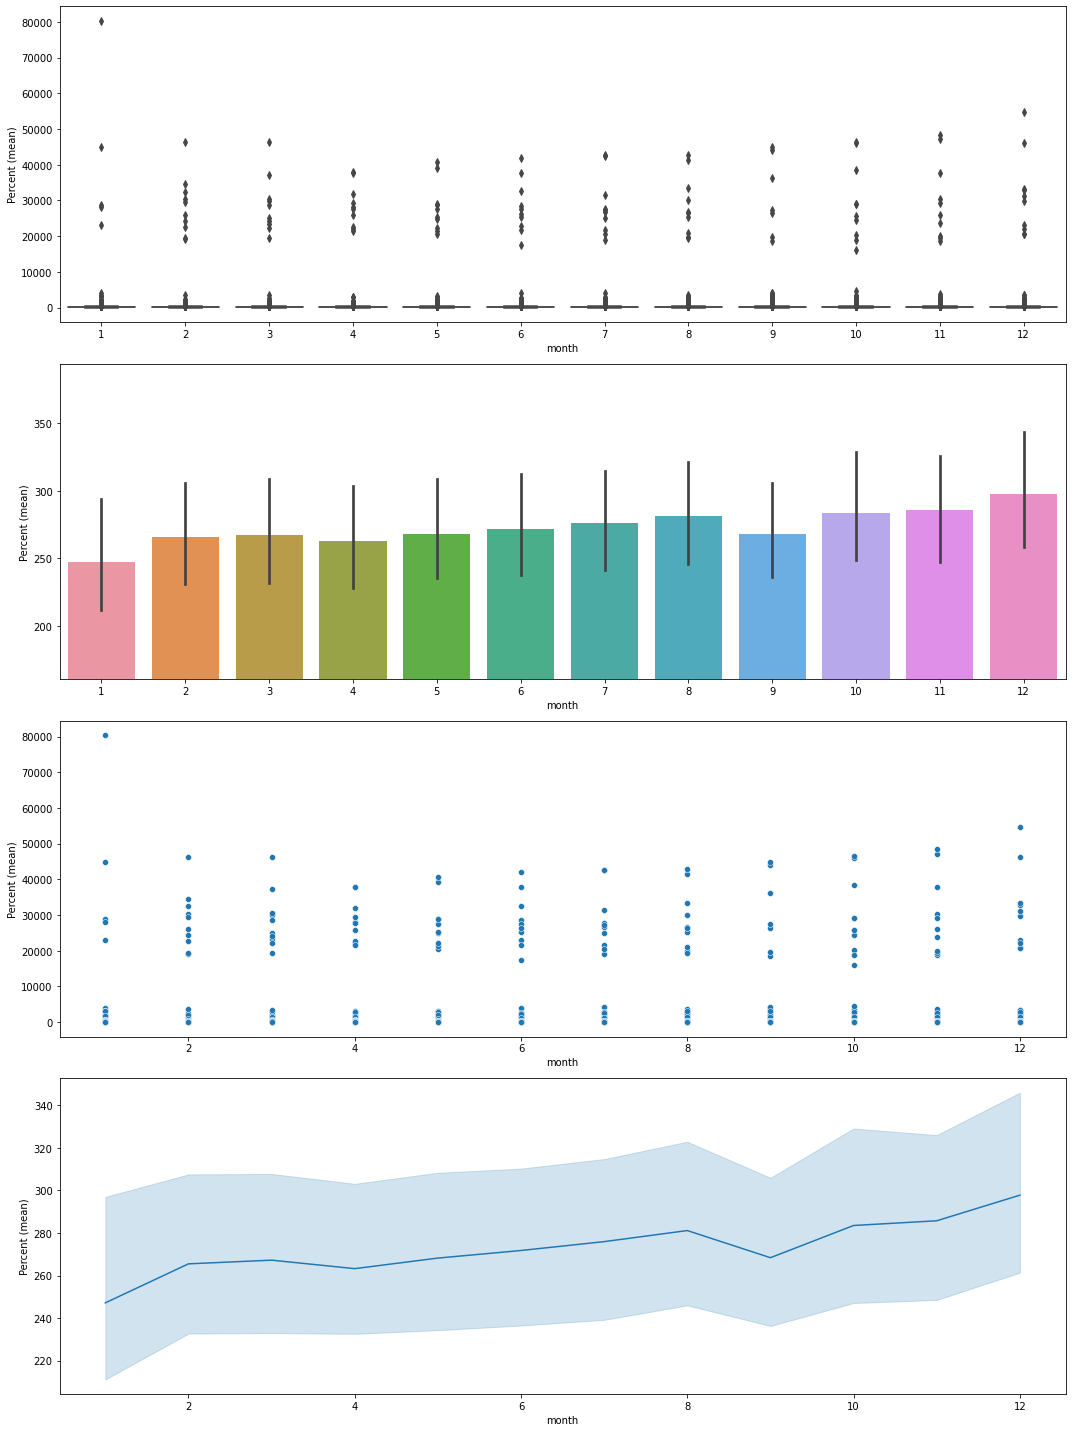

In [3]:
plot(x=Column.MONTH, y=Column.PERCENT, data=df)

## Weekly stock price fluctuations within a year

In [4]:
from analysis_base_first_date import get_best_week

df = get_best_week(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

,year,week,Symbol,Percent (mean)
0,2010,52,VRTX,100.0
1,2011,1,VRTX,99.519372
2,2011,2,VRTX,101.639813
3,2011,3,VRTX,111.563473
4,2011,4,VRTX,113.090193
...,...,...,...,...
251493,2020,49,FE,71.505376
251494,2020,50,FE,77.741934
251495,2020,51,FE,82.526882
251496,2020,52,FE,80.698924


      Percent (mean)
week                
1            208.006
2         202.647501
3          225.33356
4         206.569316
5         206.985284


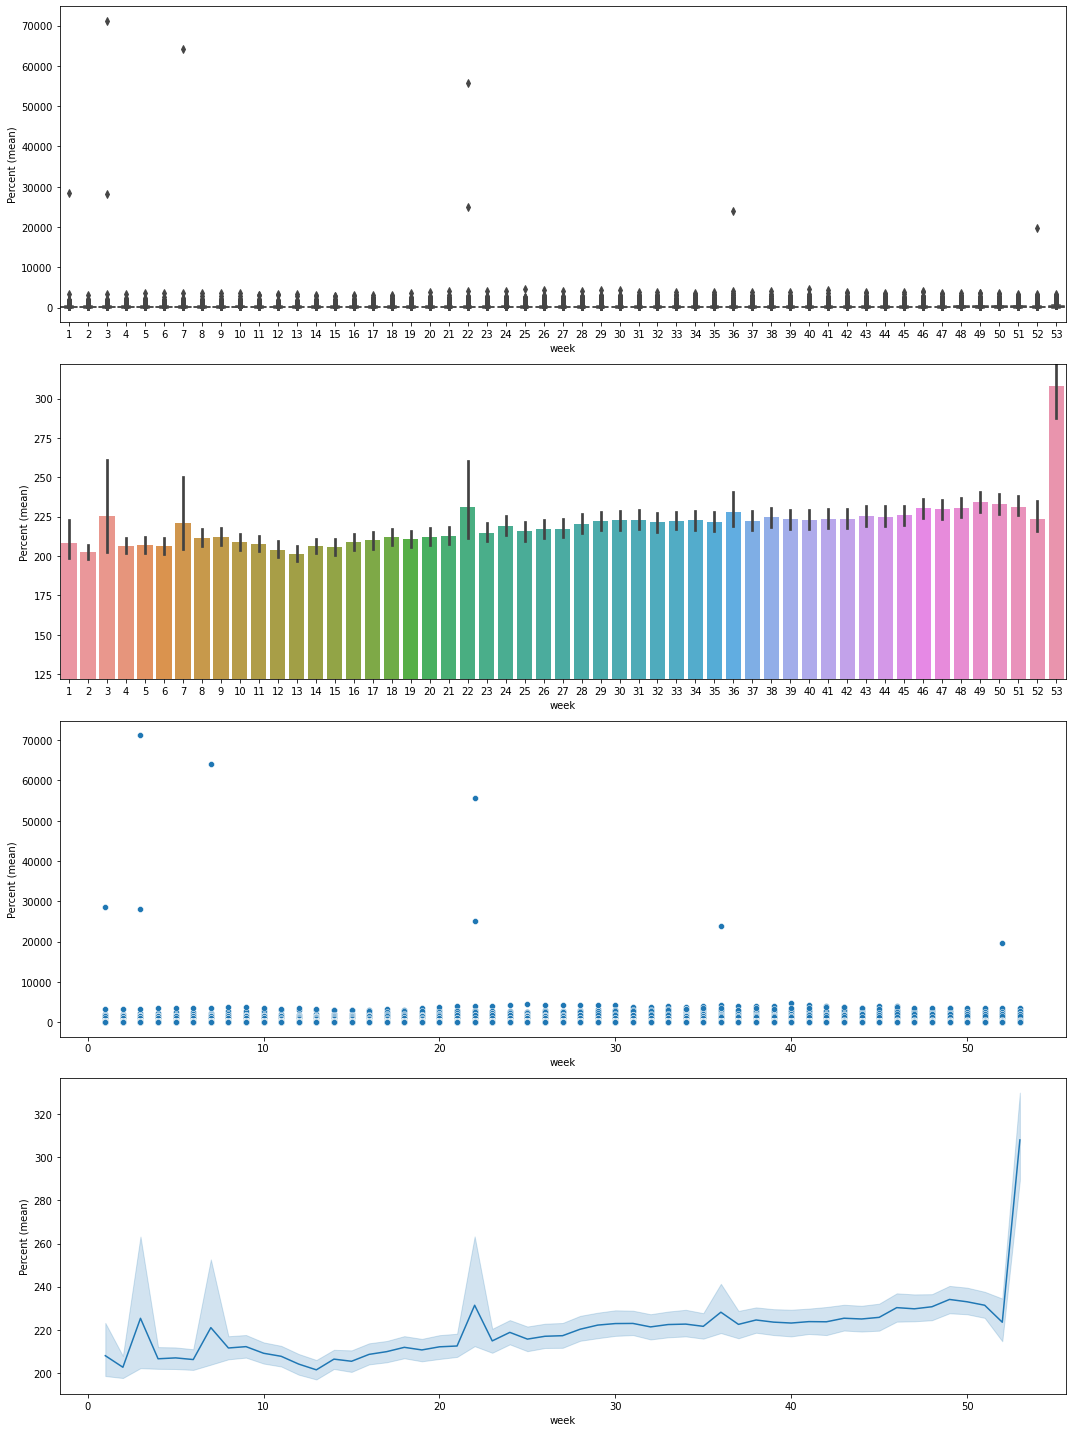

In [5]:
plot(x=Column.WEEK, y=Column.PERCENT, data=df, barplot={'quantile': (0.3, 0.85)})

## Daily stock price fluctuations within a month

In [6]:
from analysis_base_first_date import get_best_month_day

df = get_best_month_day(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

,year,month,day,Symbol,Percent (mean)
0,2016,7,5,FTV,100.0
1,2016,7,6,FTV,95.283401
2,2016,7,7,FTV,96.39676
3,2016,7,8,FTV,97.08502
4,2016,7,11,FTV,99.615383
...,...,...,...,...,...
1210794,2020,12,24,HON,417.127469
1210795,2020,12,28,HON,418.058692
1210796,2020,12,29,HON,418.851208
1210797,2020,12,30,HON,416.077371


     Percent (mean)
day                
1        215.527959
2        218.140033
3        216.986208
4        216.873947
5        217.863107


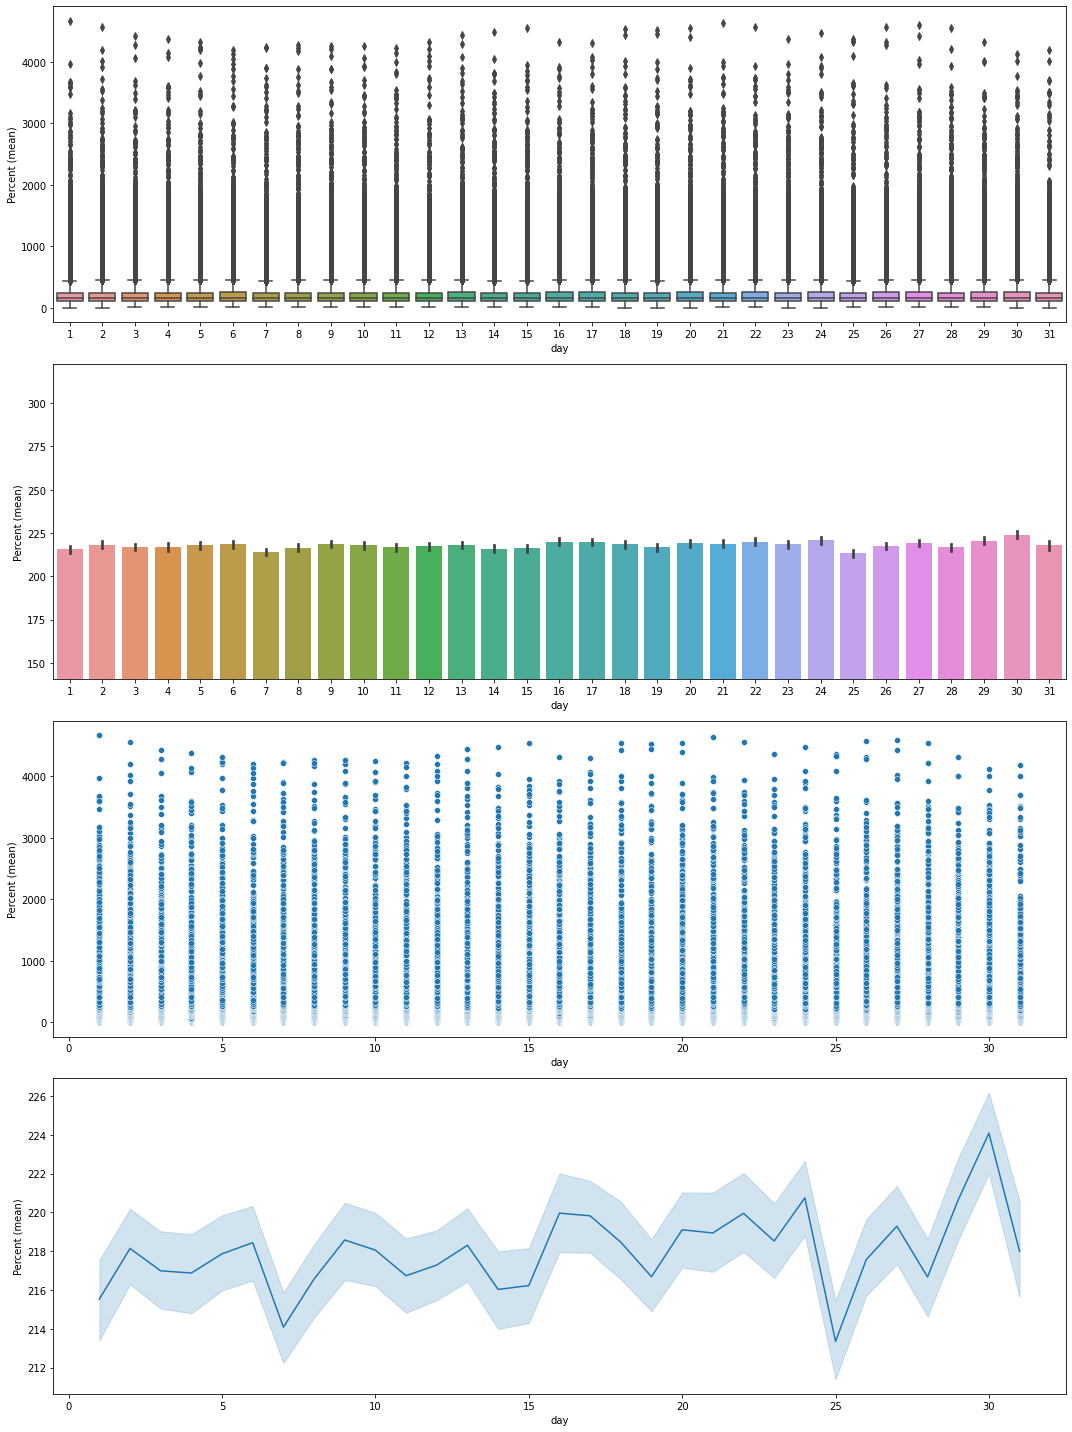

In [7]:
plot(x=Column.DAY, y=Column.PERCENT, data=df, barplot={'quantile': (0.40, 0.85)})

## Daily stock price fluctuations within a week

In [8]:
from analysis_base_first_date import get_best_weekday


df = get_best_weekday(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

,year,week,weekday,Percent (mean)
0,2016,27,1,100.0
1,2016,27,2,95.283401
2,2016,27,3,96.39676
3,2016,27,4,97.08502
4,2016,28,0,99.615383
...,...,...,...,...
1210794,2020,52,3,417.127469
1210795,2020,53,0,418.058692
1210796,2020,53,1,418.851208
1210797,2020,53,2,416.077371


         Percent (mean)
weekday                
0            218.689407
1             218.28383
2            217.715372
3            217.818413
4            217.424899


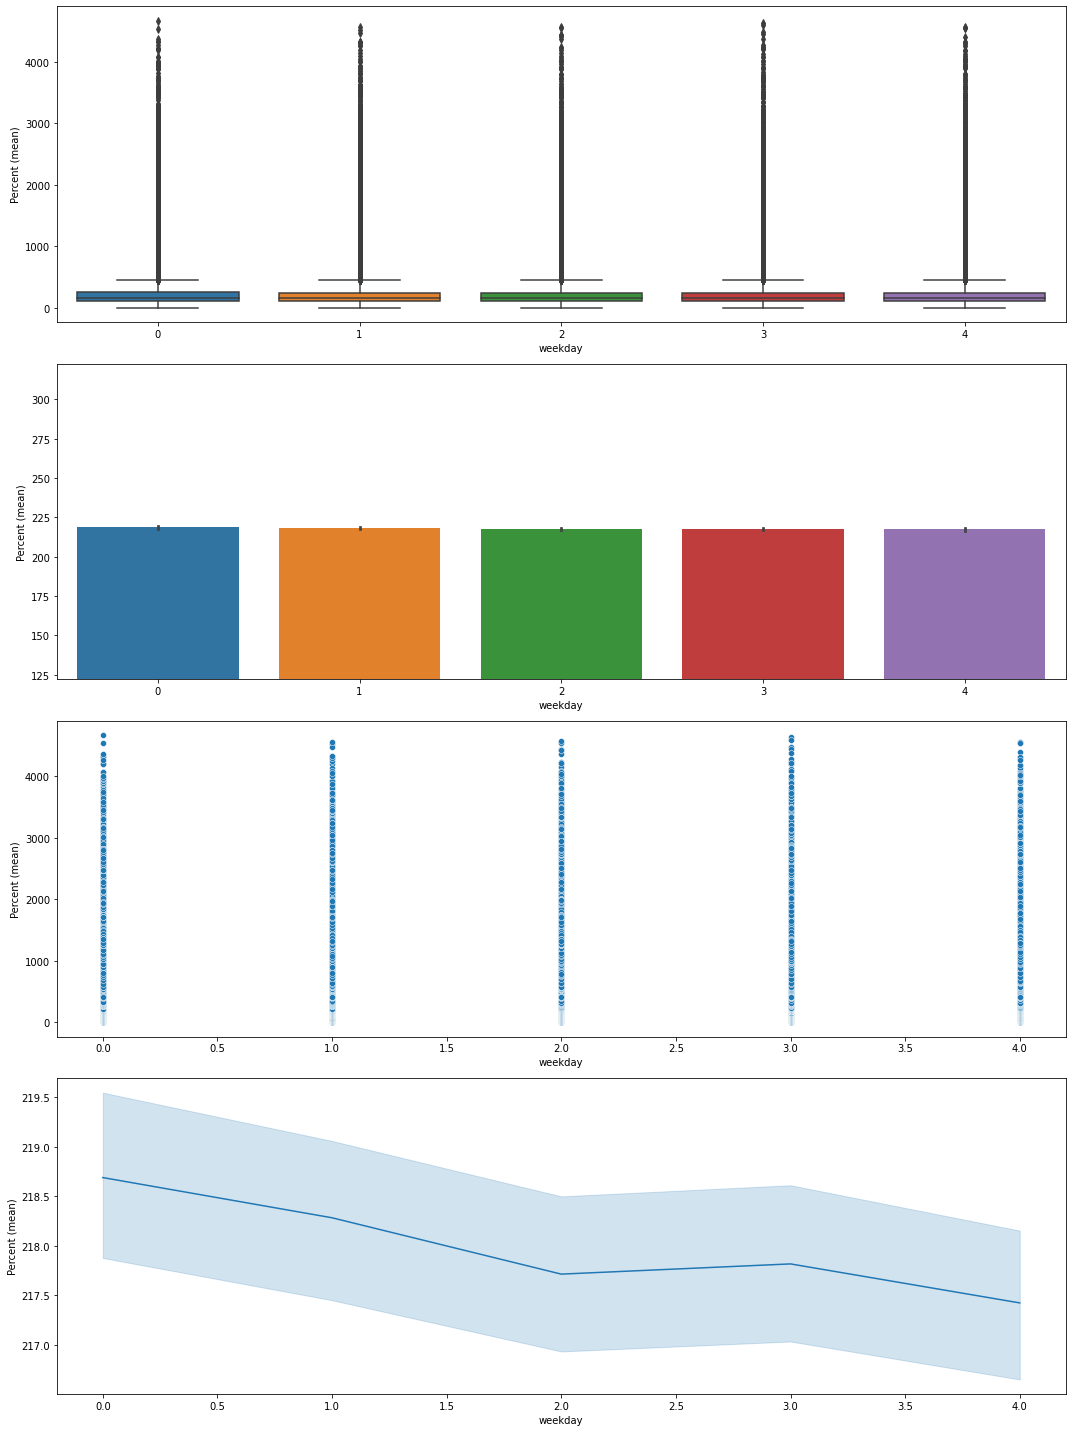

In [9]:
plot(x=Column.WEEKDAY, y=Column.PERCENT, data=df, barplot={'quantile': (0.3, 0.85)})

## Hourly stock price fluctuations within a day

In [10]:
# Yahoo support hour history only for 2 years
START_DATE = '2019-06-01'
END_DATE = '2021-05-01'

In [11]:
from analysis_base_first_date import get_best_hour

df = get_best_hour(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

,year,week,day,hour,Symbol,Percent (mean)
0,2019,23,3,9,SRE,100.0
1,2019,23,3,10,SRE,99.613043
2,2019,23,3,11,SRE,99.38922
3,2019,23,3,12,SRE,99.339901
4,2019,23,3,13,SRE,99.658576
...,...,...,...,...,...,...
1647076,2021,17,30,11,FRC,189.57772
1647077,2021,17,30,12,FRC,189.443167
1647078,2021,17,30,13,FRC,189.779549
1647079,2021,17,30,14,FRC,190.436757


      Percent (mean)
hour                
9         113.202194
10        113.212851
11        113.150465
12        113.190888
13        113.308001


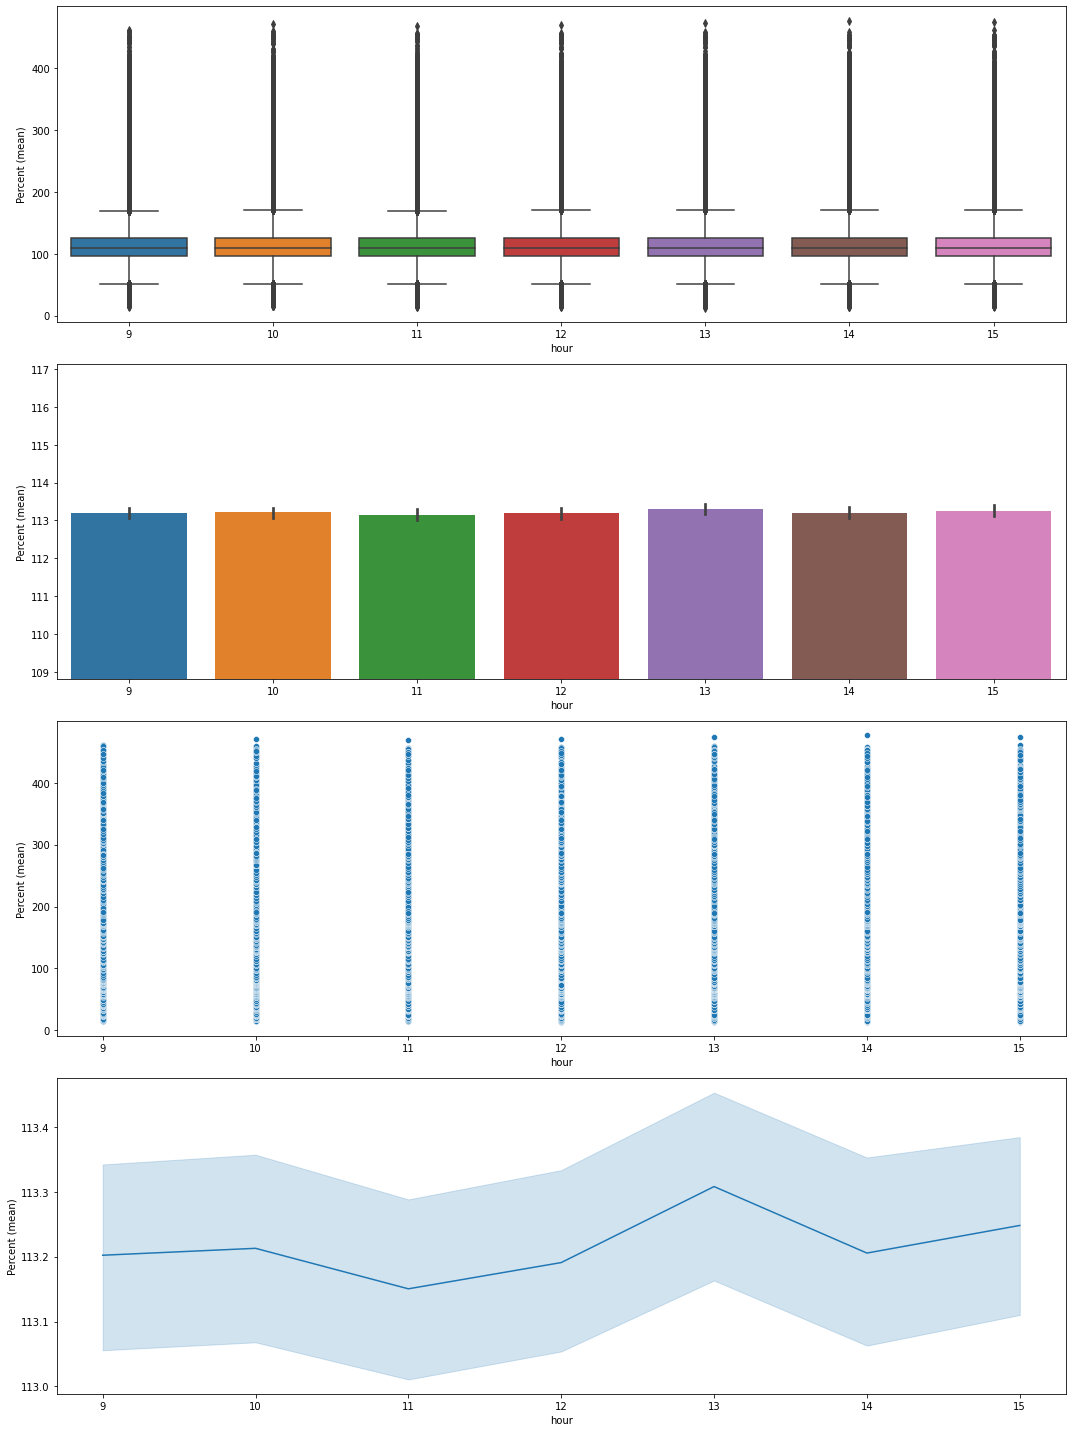

In [12]:
plot(x=Column.HOUR, y=Column.PERCENT, data=df, barplot={'quantile': (0.5, 0.65)})

## Hourly and quarterly stock price fluctuations within an day

In [13]:
# Yahoo support minute history only for 2 months
START_DATE = '2021-03-14'
END_DATE = '2021-05-11'

In [14]:
from analysis_base_first_date import get_best_time

df = get_best_time(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

,year,week,day,hour,minute,time,Symbol,Percent (mean)
0,2021,11,15,9,30,9.5,CF,100.0
1,2021,11,15,9,45,9.75,CF,100.211863
2,2021,11,15,10,0,10.0,CF,99.636803
3,2021,11,15,10,15,10.25,CF,99.878932
4,2021,11,15,10,30,10.5,CF,100.302659
...,...,...,...,...,...,...,...,...
484919,2021,19,10,14,0,14.0,CHTR,111.648417
484920,2021,19,10,14,15,14.25,CHTR,111.433012
484921,2021,19,10,14,30,14.5,CHTR,111.209602
484922,2021,19,10,14,45,14.75,CHTR,110.945363


       Percent (mean)
time                 
9.50       102.566944
9.75       102.568816
10.00      102.559469
10.25      102.558959
10.50      102.575407


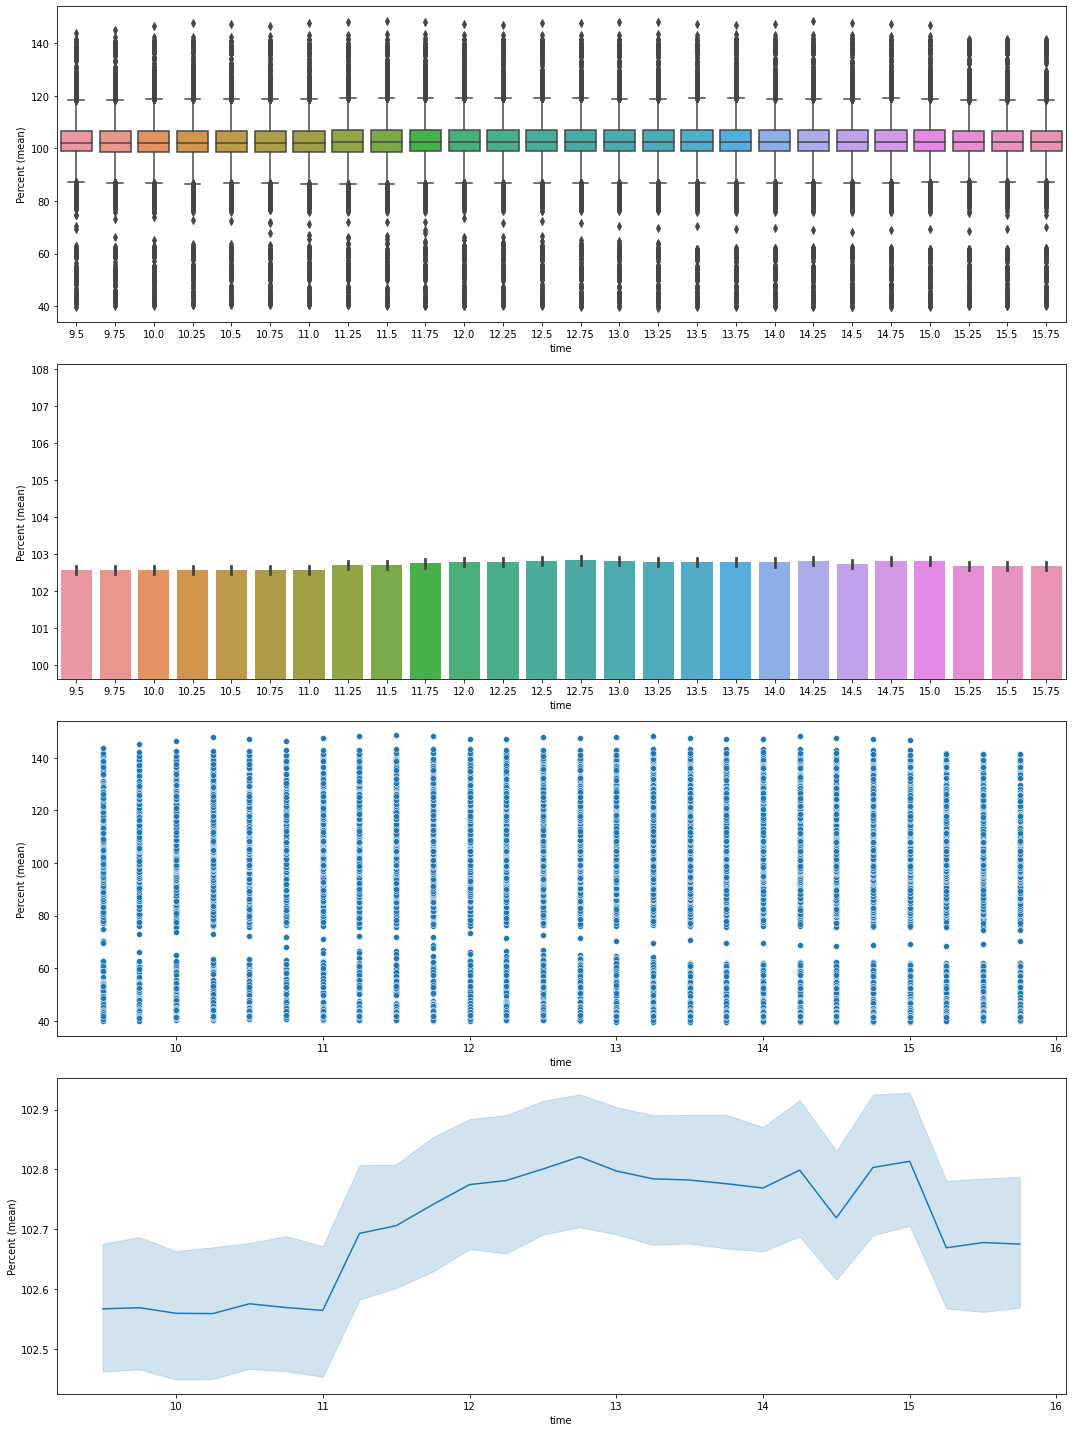

In [15]:
plot(x=Column.TIME, y=Column.PERCENT, data=df, barplot={'quantile': (0.3, 0.80)})

## Quarterly stock price fluctuations within an hour

In [16]:
from analysis_base_first_date import get_best_quarter

df = get_best_quarter(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

,year,week,day,hour,minute,quarter,Symbol,Percent (mean)
0,2021,11,15,9,30,30,CF,100.0
1,2021,11,15,9,45,45,CF,100.211863
2,2021,11,15,10,0,0,CF,99.636803
3,2021,11,15,10,15,15,CF,99.878932
4,2021,11,15,10,30,30,CF,100.302659
...,...,...,...,...,...,...,...,...
484919,2021,19,10,14,0,0,CHTR,111.648417
484920,2021,19,10,14,15,15,CHTR,111.433012
484921,2021,19,10,14,30,30,CHTR,111.209602
484922,2021,19,10,14,45,45,CHTR,110.945363


         Percent (mean)
quarter                
0            102.712637
15           102.714177
30           102.689099
45           102.707352


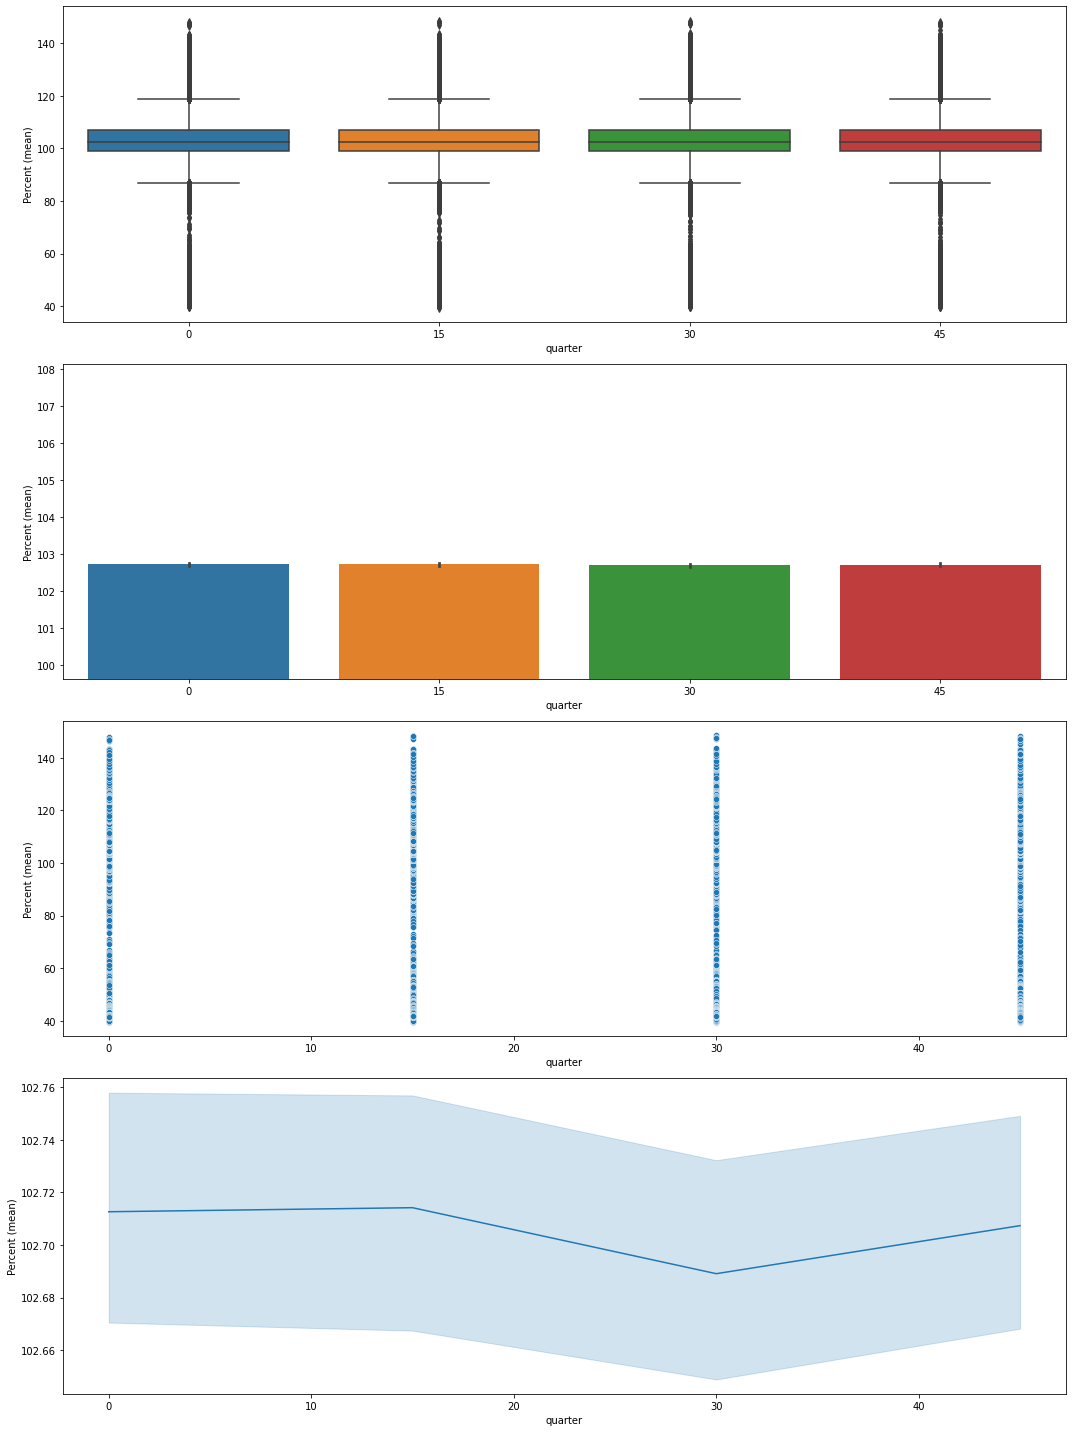

In [17]:
plot(x=Column.QUARTER, y=Column.PERCENT, data=df, barplot={'quantile': (0.3, 0.80)})